In [1]:
import numpy as np
from math import *
import scipy.integrate as integrate
import matplotlib.pyplot as pyplot
%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\Users\apun\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['cosh', 'degrees', 'floor', 'sin', 'trunc', 'sinh', 'log', 'cos', 'tanh', 'log10', 'ceil', 'fabs', 'isinf', 'ldexp', 'isnan', 'expm1', 'tan', 'gcd', 'sqrt', 'radians', 'lcm', 'hypot', 'inf', 'pi', 'log1p', 'fmod', 'modf', 'exp', 'nan', 'gamma', 'log2', 'copysign', 'isclose', 'e', 'remainder', 'nextafter', 'isfinite', 'prod', 'frexp']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:

# define the filter function
def filter_function(w,tau, tpi=100e-9):
    t1 = (tau + tpi)/2; 
    
    return ( abs( 1 + exp(1j*w*tau) - 2*exp(1j*w*t1)*cos(w*tpi/2) ) )**2/ w**2/ tau; 





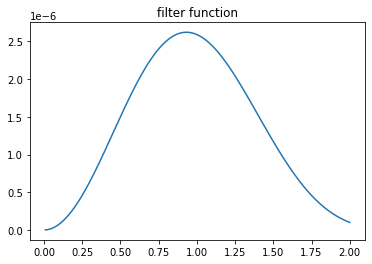

In [3]:
# plot the filter function

tau = 5e-6;
w = np.linspace(0.01e6, 2e6, 5000); # rad/s
FF2 = filter_function(w,tau)
pyplot.title("filter function");
pyplot.plot(w/1e6, FF2);


In [4]:
# dx is the dx/dw
def dx(w, tau, tpi=100e-9,ttwo=343.43, p=1):

    filter_function_vals = filter_function(w,tau);


    dxt = 1/2/pi * (pi / ttwo)**p * ( 1/w )**(p+1) * filter_function_vals;

    return dxt;

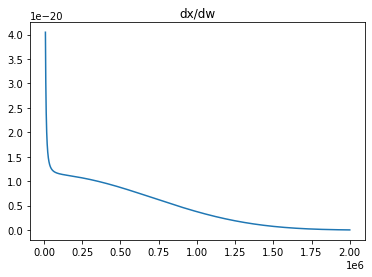

In [5]:
pyplot.title("dx/dw");

pyplot.plot(w,dx(w,tau=tau));

In [6]:

def x_quad(tau):
    return integrate.quad(dx,0,inf,args=(tau))[0];

def x(tau):
    w = np.linspace(0,3000,10000);
    dx_vals = dx(w,tau);
    return integrate.trapz(dx_vals, w);

def c(tau):
    return exp(-x_quad(tau));


[-1.455900752088374e-11, -1.229985107976801e-11, -1.0647632137373128e-11, -9.386728145711927e-12, -8.392839045732004e-12, -7.589269054326579e-12, -6.926128680363977e-12, -6.369564338266317e-12, -5.895794582814448e-12, 7.661898887167165e-09, 7.165804715296159e-09, 6.730046321222299e-09, 6.344247488398781e-09, 6.000282264109568e-09, 5.6916963201982415e-09, 5.4132981318442e-09, 5.16086454155184e-09, 4.930925033756318e-09, 4.7206012187719136e-09, 4.527485716135127e-09, 4.349549598206771e-09, 4.18507083396639e-09, 4.0325783766726225e-09, 3.890808045532382e-09, 3.7586673975215806e-09, 3.635207522276967e-09, 3.519600218881081e-09, 3.4111193933797306e-09, 3.3091257936208013e-09, 3.213054403186937e-09, 3.122403969269402e-09, 3.036728254611923e-09, 2.9556286912208125e-09, 2.878748180604915e-09, 2.805765837078622e-09, 2.7363925109029372e-09, 2.6703669595540647e-09, 2.60745256022141e-09, 2.5474344763394444e-09, 2.490117206633171e-09, 2.435322457764807e-09, 2.382887291805797e-09, 2.332662507977255e

C:\Users\apun\AppData\Local\Temp/ipykernel_7088/495459028.py:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(dx,0,inf,args=(tau))[0];


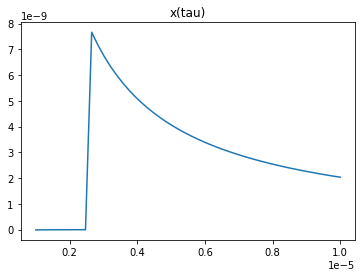

In [7]:
#tau = np.linspace(1e-6,5e-6,5000);


x_vals = [];
tau_range = np.linspace(1e-6,1e-5);
for tau in tau_range:
    x_vals.append(x_quad(tau));
print(x_vals);
pyplot.title("x(tau)");
pyplot.plot(tau_range,x_vals);


[1.000000000014559, 1.0000000000123, 1.0000000000106477, 1.0000000000093867, 1.0000000000083928, 1.0000000000075893, 1.0000000000069262, 1.0000000000063696, 1.0000000000058957, 0.9999999923381011, 0.9999999928341953, 0.9999999932699537, 0.9999999936557525, 0.9999999939997177, 0.9999999943083037, 0.9999999945867019, 0.9999999948391355, 0.999999995069075, 0.9999999952793988, 0.9999999954725143, 0.9999999956504504, 0.9999999958149292, 0.9999999959674216, 0.999999996109192, 0.9999999962413326, 0.9999999963647925, 0.9999999964803998, 0.9999999965888806, 0.9999999966908742, 0.9999999967869456, 0.999999996877596, 0.9999999969632718, 0.9999999970443713, 0.9999999971212519, 0.9999999971942342, 0.9999999972636074, 0.9999999973296331, 0.9999999973925474, 0.9999999974525655, 0.9999999975098828, 0.9999999975646775, 0.9999999976171127, 0.9999999976673375, 0.9999999977154888, 0.9999999977616923, 0.9999999978060641, 0.9999999978487107, 0.9999999978897312, 0.9999999979292163, 0.9999999979672511]


C:\Users\apun\AppData\Local\Temp/ipykernel_7088/495459028.py:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(dx,0,inf,args=(tau))[0];


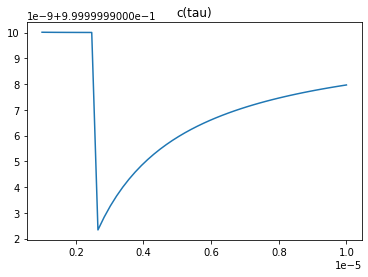

In [8]:
c_vals = [];
for tau in tau_range:
    c_vals.append(c(tau));
print(c_vals);
pyplot.title("c(tau)");
pyplot.plot(tau_range,c_vals);
